# Forecasting System to Predict Product Demand
**Author**: Prathmesh Powar  
**Project**: TCS iON RIO-125 Internship  
**Objective**: Build a forecasting system to predict product demand at a retail outlet using historical data from Kaggle's "Store Sales - Time Series Forecasting" dataset.

# Week 1: Dataset Setup and Initial Inspection
- Load key datasets only.
- Check structure and missing values.
- Visualize sales trends to build initial understanding.


# *Load Essential Libraries and Data*

In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Load key datasets
data_path = "/kaggle/input/store-sales-time-series-forecasting/"
train_df = pd.read_csv(data_path + "train.csv")
test_df = pd.read_csv(data_path + "test.csv")
stores_df = pd.read_csv(data_path + "stores.csv")
holidays_df = pd.read_csv(data_path + "holidays_events.csv")

# Display dataset shapes
print("Train:", train_df.shape)
print("Test:", test_df.shape)
print("Stores:", stores_df.shape)
print("Holidays:", holidays_df.shape)


Train: (3000888, 6)
Test: (28512, 5)
Stores: (54, 5)
Holidays: (350, 6)


# *Check Data Structure and Missing Values*

In [2]:
# Display first few rows of each dataset
print(train_df.head(3))
print(stores_df.head(3))

# Check for missing values
print("\nMissing Values in Train Data:\n", train_df.isnull().sum())    

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
   store_nbr   city      state type  cluster
0          1  Quito  Pichincha    D       13
1          2  Quito  Pichincha    D       13
2          3  Quito  Pichincha    D        8

Missing Values in Train Data:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


# *Sales Trend Over Time*

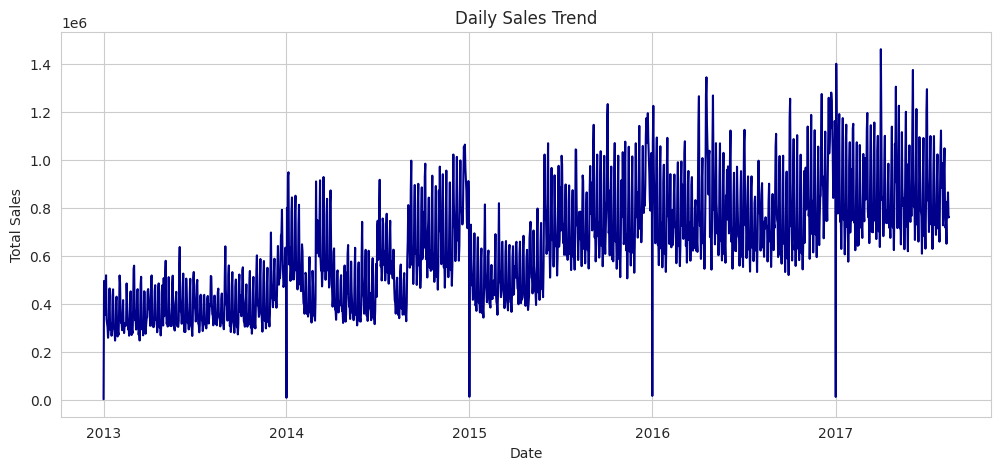

In [3]:
# Convert date column to datetime
train_df["date"] = pd.to_datetime(train_df["date"])

# Group sales by date
daily_sales = train_df.groupby("date")["sales"].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, color="darkblue")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


# Week 2: Data Exploration and Merging
- Explore store details and holiday data.
- Merge key datasets for a complete view.
- Visualize how holidays impact sales.

# *Load and Explore the Data*

In [4]:
#Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Datasets for a Full View*

In [5]:
#Merge and Clean Data
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]  # Exclude transferred holidays
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')

print("Missing Values in Merged Data:")
print(train_full_df.isnull().sum())

train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')  # Holiday type
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

Missing Values in Merged Data:
id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
type_y         2567862
locale         2567862
locale_name    2567862
description    2567862
transferred    2567862
dtype: int64


# *Visualize Sales by Store Type*

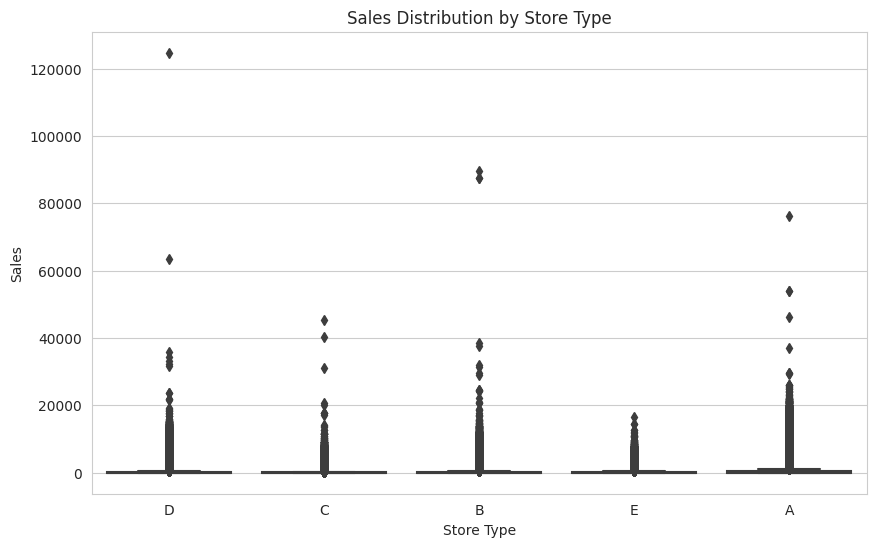

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_full_df, x='type_x', y='sales')  # Store type
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# *Visualize Sales by Holiday Type and Store Average*

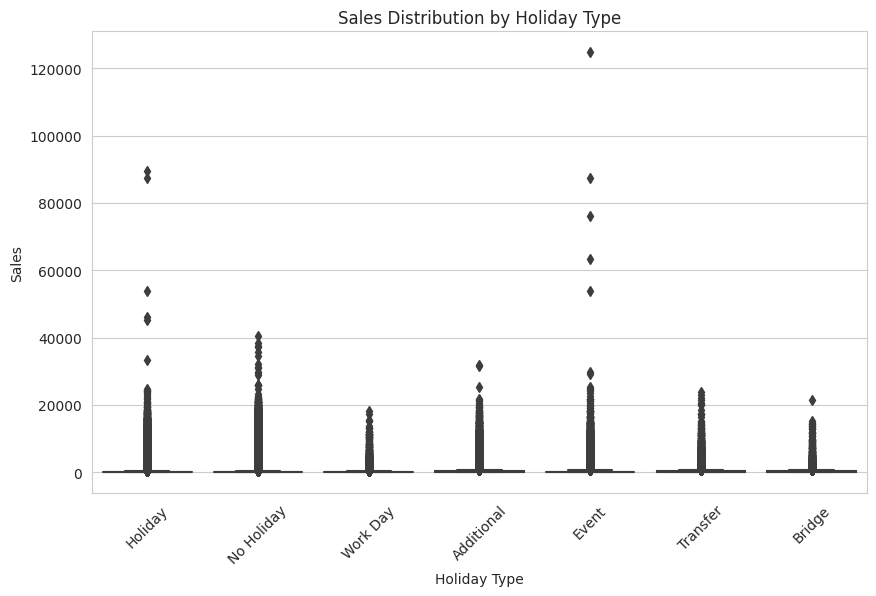

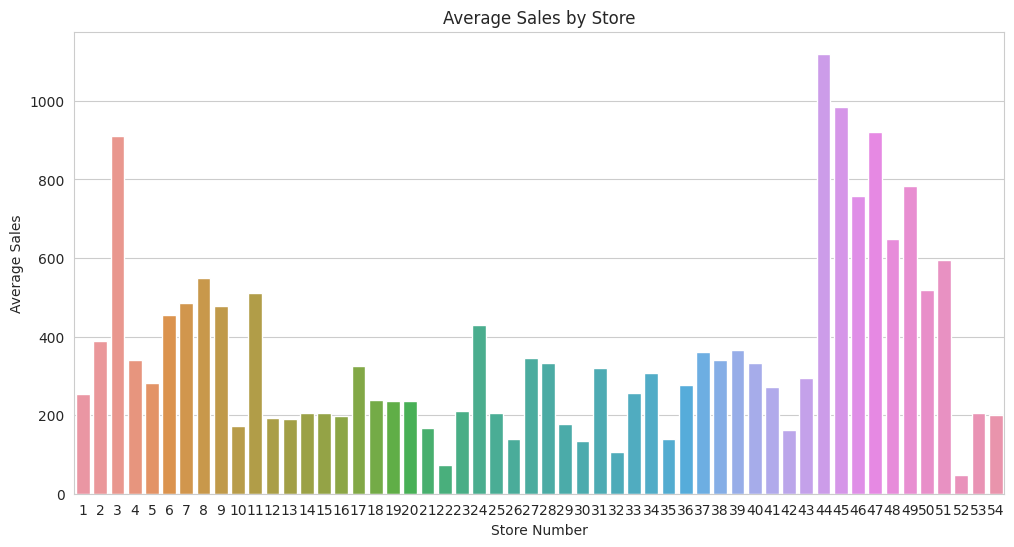

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_full_df, x='type_y', y='sales')
plt.title('Sales Distribution by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

avg_sales_store = train_full_df.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sales_store, x='store_nbr', y='sales')
plt.title('Average Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.show()

# ***Week 3 Start: Gaining Momentum***
- Add time-based features to merged data
- Analyze sales trends over time
- Visualize key patterns for forecasting prep

In [8]:
#Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Data and Add Time Features*

In [9]:
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

# Add time features
train_full_df['date'] = pd.to_datetime(train_full_df['date'])
train_full_df['year'] = train_full_df['date'].dt.year
train_full_df['month'] = train_full_df['date'].dt.month
train_full_df['day_of_week'] = train_full_df['date'].dt.dayofweek

# *Visualize Sales Trend Over Time*


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


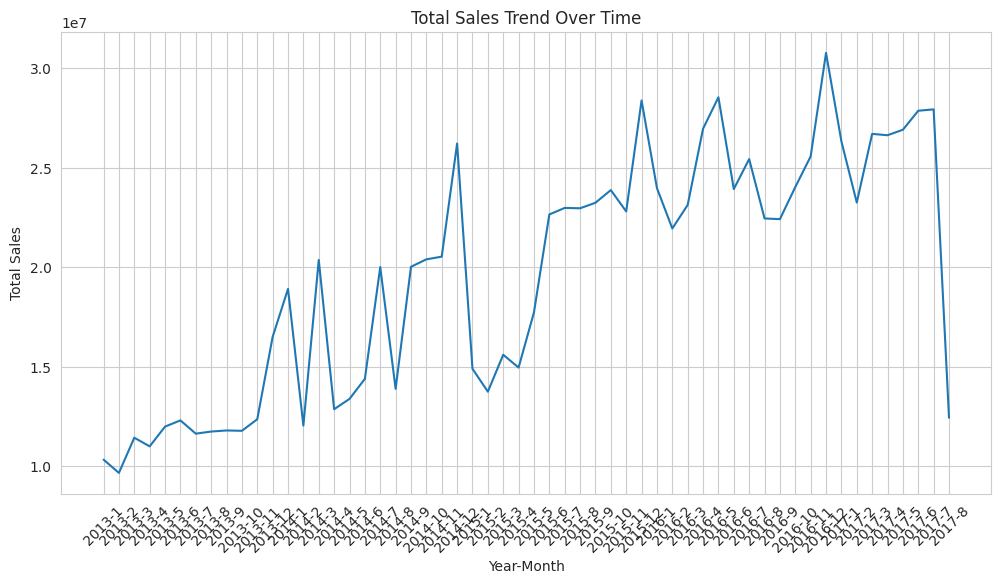

In [10]:
monthly_sales = train_full_df.groupby(['year', 'month'])['sales'].sum().reset_index()
monthly_sales['time'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='time', y='sales')
plt.title('Total Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# *Visualize Sales by Day of Week and Holiday Impact*

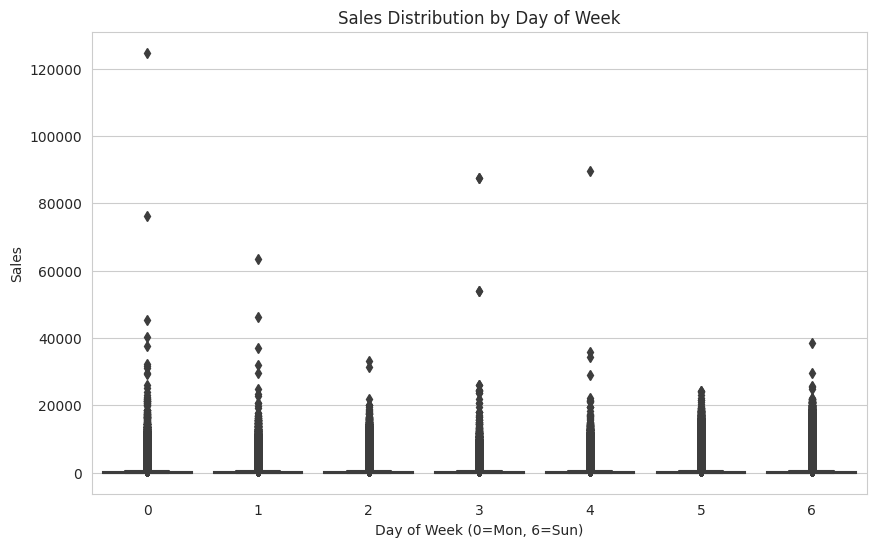

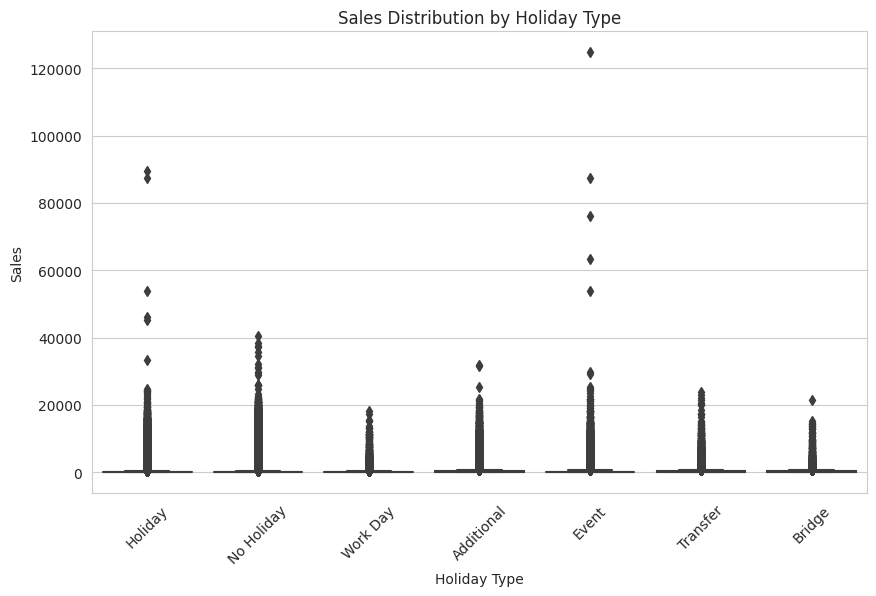

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_full_df, x='day_of_week', y='sales')
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_full_df, x='type_y', y='sales')
plt.title('Sales Distribution by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# ***Week 4 Start: Initial Deliverables***
- Build a baseline time-series model (e.g., moving average)
- Generate predictions for a sample period
- Visualize actual vs. predicted sales

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Data and Prepare Time Series*

In [13]:
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

train_full_df['date'] = pd.to_datetime(train_full_df['date'])
daily_sales = train_full_df.groupby('date')['sales'].sum().reset_index()

# *Build Baseline Moving Average Model*


In [14]:
window_size = 7  # 7-day moving average
daily_sales['moving_avg'] = daily_sales['sales'].rolling(window=window_size, min_periods=1).mean()

# Split for validation (last 30 days as test)
train_data = daily_sales[:-30]
test_data = daily_sales[-30:].copy()  
test_data['predicted'] = train_data['moving_avg'].iloc[-1]  

# *Visualize Actual vs Predicted Sales*

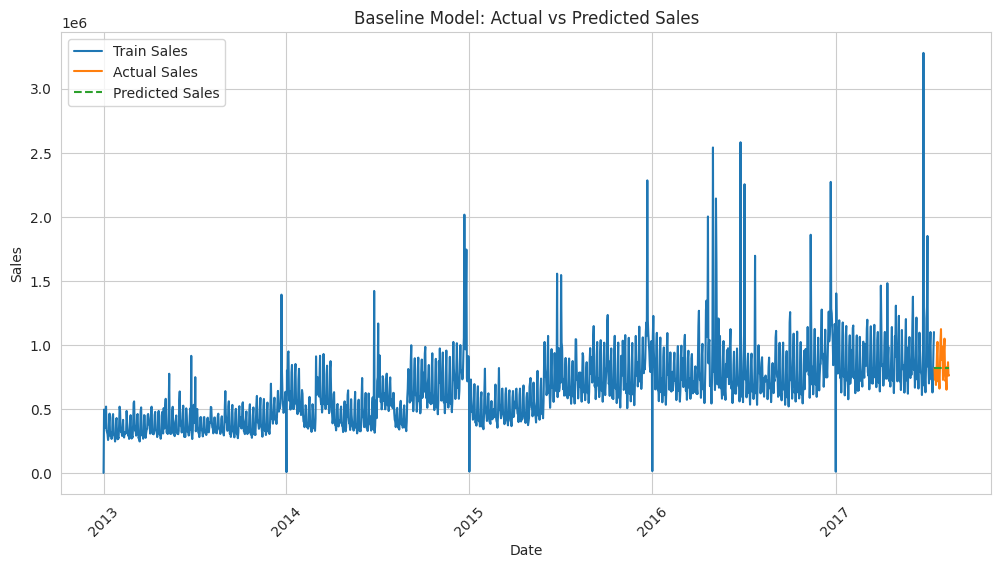

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['sales'], label='Train Sales')
plt.plot(test_data['date'], test_data['sales'], label='Actual Sales')
plt.plot(test_data['date'], test_data['predicted'], label='Predicted Sales', linestyle='--')
plt.title('Baseline Model: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ***Week 5 Start: Mid-Phase Project Work***
- Enhance baseline model with seasonal decomposition
- Evaluate model performance with a metric
- Visualize decomposed components and predictions

In [16]:
# Title: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add numpy for array conversion
from statsmodels.tsa.seasonal import seasonal_decompose

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# **Merge Data and Prepare Time Series**

In [17]:
# Title: Merge Data and Prepare Time Series
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

train_full_df['date'] = pd.to_datetime(train_full_df['date'])
daily_sales = train_full_df.groupby('date')['sales'].sum().reset_index()
daily_sales = daily_sales.set_index('date')  # Set date as index for decomposition

# *Decompose Time Series and Predict*

In [18]:
# Title: Decompose Time Series and Predict
result = seasonal_decompose(daily_sales['sales'], model='additive', period=7)
daily_sales['trend'] = result.trend
daily_sales['seasonal'] = result.seasonal
daily_sales['residual'] = result.resid

# Reset index for splitting
daily_sales = daily_sales.reset_index()

# Split data
train_data = daily_sales[:-30]
test_data = daily_sales[-30:].copy()

# Debug: Check values
print("Test data seasonal values:", test_data['seasonal'].head())
last_trend = daily_sales['trend'].dropna().iloc[-1]
print("Last trend value used:", last_trend)
test_data['predicted'] = last_trend + test_data['seasonal'].fillna(0)
print("Test data predicted values (before plot):", test_data['predicted'].head())

Test data seasonal values: 1654    52980.658993
1655    30976.103602
1656    16993.832387
1657   -25225.120080
1658   -66064.291374
Name: seasonal, dtype: float64
Last trend value used: 770536.4089387143
Test data predicted values (before plot): 1654    823517.067932
1655    801512.512541
1656    787530.241326
1657    745311.288859
1658    704472.117564
Name: predicted, dtype: float64


# *Visualize Decomposition and Predictions*

Plotting predicted values (as numpy array): [823517.06793184 801512.51254073 787530.24132595 745311.28885903
 704472.11756443]


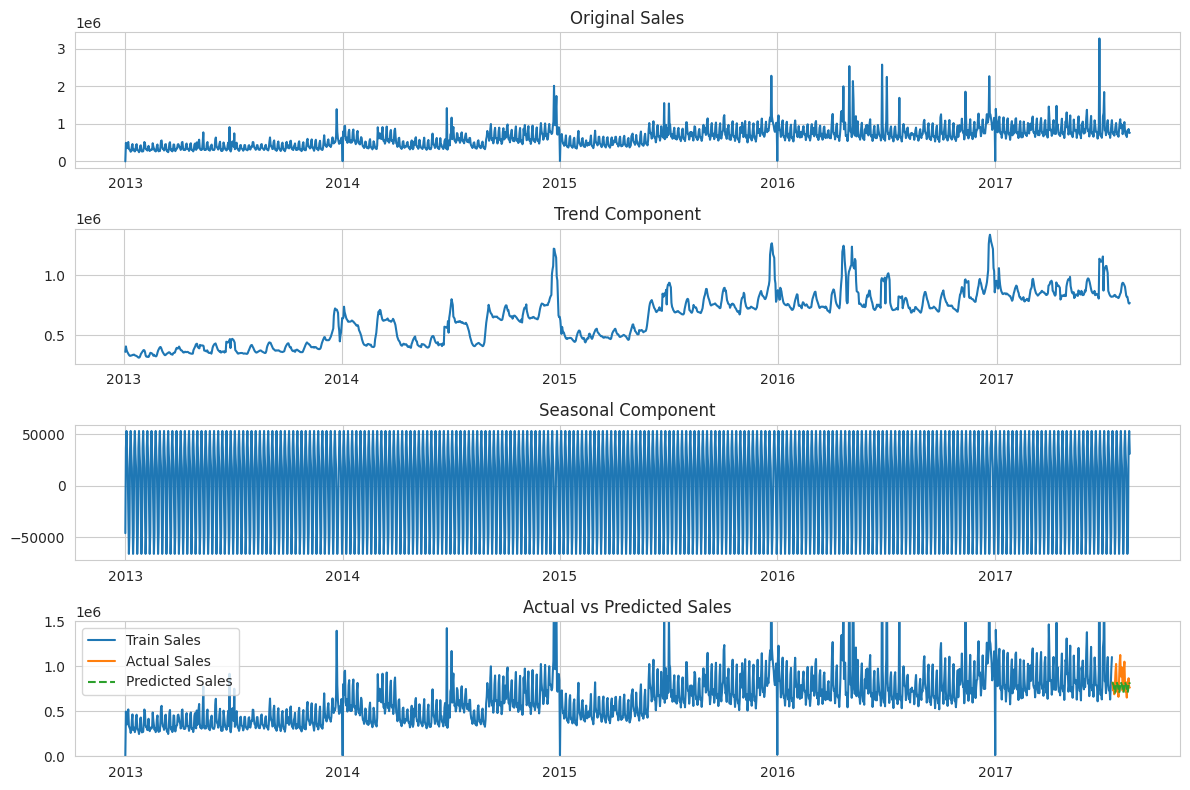

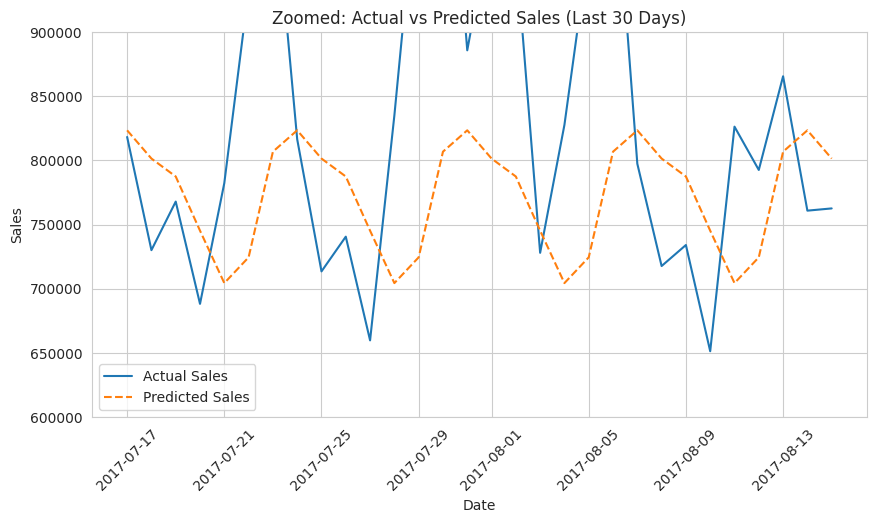

In [19]:
# Title: Visualize Decomposition and Predictions
# Convert predicted values to numpy array to avoid matplotlib issues
predicted_values = test_data['predicted'].to_numpy()
print("Plotting predicted values (as numpy array):", predicted_values[:5])

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(daily_sales['date'], daily_sales['sales'], label='Original')
plt.title('Original Sales')
plt.subplot(4, 1, 2)
plt.plot(daily_sales['date'], daily_sales['trend'], label='Trend')
plt.title('Trend Component')
plt.subplot(4, 1, 3)
plt.plot(daily_sales['date'], daily_sales['seasonal'], label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(4, 1, 4)
plt.plot(train_data['date'], train_data['sales'], label='Train Sales')
plt.plot(test_data['date'], test_data['sales'], label='Actual Sales')
plt.plot(test_data['date'], predicted_values, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.ylim(0, 1.5e6)  # Ensure y-axis includes predicted range
plt.tight_layout()
plt.show()

# Zoomed plot
plt.figure(figsize=(10, 5))
plt.plot(test_data['date'], test_data['sales'], label='Actual Sales')
plt.plot(test_data['date'], predicted_values, label='Predicted Sales', linestyle='--')
plt.title('Zoomed: Actual vs Predicted Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.ylim(600000, 900000)  # Zoom y-axis to predicted range for clarity
plt.xticks(rotation=45)
plt.show()

# ***Week 6: Midway Reflection and Adjustment Start***
- Reflect on progress from Weeks 1–5
- Adjust the model based on insights

In [20]:
# Title: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Data and Prepare Time Series*

In [21]:
# Title: Merge Data and Prepare Time Series
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

train_full_df['date'] = pd.to_datetime(train_full_df['date'])
daily_sales = train_full_df.groupby('date')['sales'].sum().reset_index()
daily_sales = daily_sales.set_index('date')

# Fix: Reindex to ensure continuous daily data, filling missing dates with 0
full_date_range = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq='D')
daily_sales = daily_sales.reindex(full_date_range).fillna(0)

# *Reflect and Adjust ARIMA Model*

In [22]:
# Title: Reflect and Adjust with SARIMA Model
# Prepare data
train_data = daily_sales['sales'][:-30]
test_data = daily_sales['sales'][-30:]

# Initial ARIMA model (p=1, d=1, q=1) for comparison
model_initial = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit_initial = model_initial.fit(disp=False)
forecast_initial = model_fit_initial.forecast(steps=30)
rmse_initial = np.sqrt(mean_squared_error(test_data.dropna(), forecast_initial[:len(test_data.dropna())]))
print(f"Initial ARIMA (1,1,1) RMSE: {rmse_initial}")

# Adjusted SARIMA model with weekly seasonality (period=7)
model_adjusted = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit_adjusted = model_adjusted.fit(disp=False)
forecast_adjusted = model_fit_adjusted.forecast(steps=30)
rmse_adjusted = np.sqrt(mean_squared_error(test_data.dropna(), forecast_adjusted[:len(test_data.dropna())]))
print(f"Adjusted SARIMA (1,1,1)(1,1,1,7) RMSE: {rmse_adjusted}")

# Store adjusted predictions
test_data_df = pd.DataFrame({'date': test_data.index, 'actual': test_data.values})
test_data_df['predicted'] = forecast_adjusted.values

Initial ARIMA (1,1,1) RMSE: 157331.48527867664
Adjusted SARIMA (1,1,1)(1,1,1,7) RMSE: 112053.7469337568


# *Visualize Adjusted Predictions*

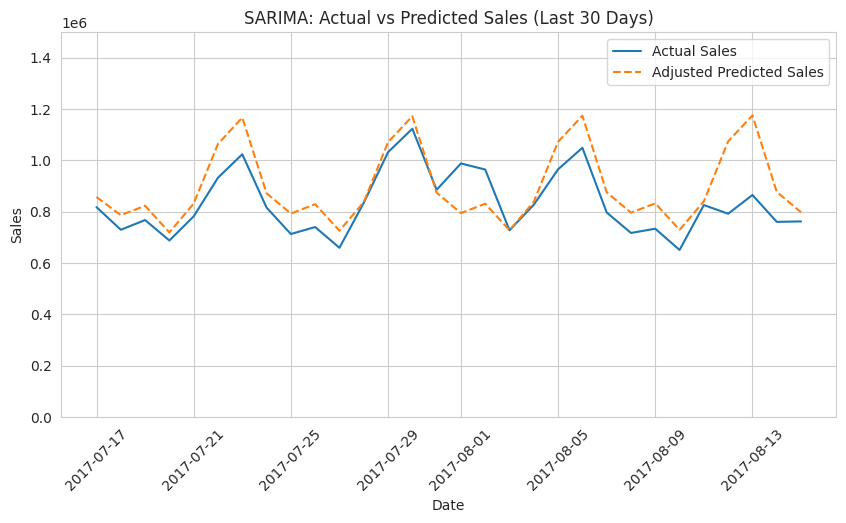

In [23]:
# Title: Visualize Adjusted Predictions
plt.figure(figsize=(10, 5))
plt.plot(test_data_df['date'], test_data_df['actual'], label='Actual Sales')
plt.plot(test_data_df['date'], test_data_df['predicted'], label='Adjusted Predicted Sales', linestyle='--')
plt.title('SARIMA: Actual vs Predicted Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.ylim(0, 1.5e6)
plt.xticks(rotation=45)
plt.show()

# ***Week 7: Focused Project Work Start***
- Incorporate holiday effects into the SARIMA model
- Evaluate performance with RMSE

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Data and Prepare Time Series*

In [62]:
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

train_full_df['date'] = pd.to_datetime(train_full_df['date'])
daily_sales = train_full_df.groupby('date')['sales'].sum().reset_index()
daily_sales = daily_sales.set_index('date')

# Reindex to ensure continuous daily data
full_date_range = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq='D')
daily_sales = daily_sales.reindex(full_date_range).fillna(0)

# Create holiday indicator
holidays = train_full_df.groupby('date')['type_y'].first().reset_index()
holidays['date'] = pd.to_datetime(holidays['date'])
holidays = holidays.set_index('date').reindex(full_date_range).fillna('No Holiday')
holidays['is_holiday'] = (holidays['type_y'] != 'No Holiday').astype(int)

# *Enhance SARIMA Model with Holiday Effects*

In [63]:
# Prepare data
train_data = daily_sales['sales'][:-30]
test_data = daily_sales['sales'][-30:]

train_holidays = holidays['is_holiday'][:-30]
test_holidays = holidays['is_holiday'][-30:]

# SARIMA with exogenous holiday variable
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), exog=train_holidays)
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=30, exog=test_holidays)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"SARIMA with Holidays RMSE: {rmse}")

# Store predictions
test_data_df = pd.DataFrame({'date': test_data.index, 'actual': test_data.values})
test_data_df['predicted'] = forecast.values

SARIMA with Holidays RMSE: 147305.09295919086


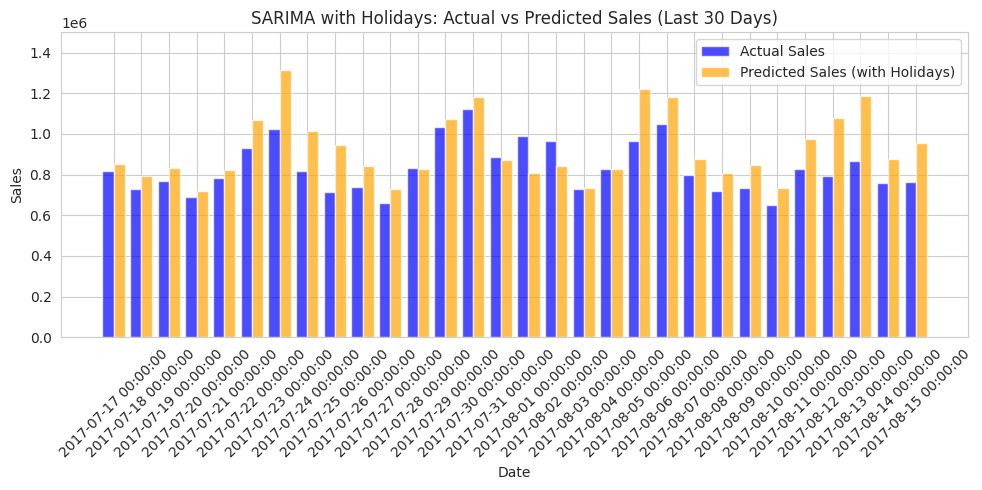

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(10, 5))

# Bar width
bar_width = 0.4
dates = np.arange(len(test_data_df))

# Plot bars for actual and predicted sales
plt.bar(dates - bar_width/2, test_data_df['actual'], width=bar_width, label='Actual Sales', color='blue', alpha=0.7)
plt.bar(dates + bar_width/2, test_data_df['predicted'], width=bar_width, label='Predicted Sales (with Holidays)', color='orange', alpha=0.7)

# Formatting the plot
plt.title('SARIMA with Holidays: Actual vs Predicted Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(ticks=dates, labels=test_data_df['date'], rotation=45)
plt.ylim(0, 1.5e6)
plt.legend()
plt.tight_layout()
plt.show()


# ***Week 8: Tackling Advanced Challenges Start***
- Introduce Prophet for better handling of trends, seasonality, and holidays
- Evaluate performance with RMSE

In [66]:
# Title: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Data and Prepare Time Series*

In [67]:
# Title: Merge Data and Prepare Time Series
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

train_full_df['date'] = pd.to_datetime(train_full_df['date'])
daily_sales = train_full_df.groupby('date')['sales'].sum().reset_index()

# Prepare data for Prophet
daily_sales = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})

# Prepare holidays for Prophet
holidays = train_full_df.groupby('date')['type_y'].first().reset_index()
holidays = holidays[holidays['type_y'] != 'No Holiday']
holidays = holidays.rename(columns={'date': 'ds', 'type_y': 'holiday'})

# *Build and Evaluate Prophet Model*

In [68]:
# Title: Build and Evaluate Prophet Model
# Prepare data
train_data = daily_sales[:-30]
test_data = daily_sales[-30:]

# Initialize Prophet model with holidays
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='US')  # Add country-specific holidays
for holiday in holidays['holiday'].unique():
    model.add_seasonality(name=holiday, period=1, fourier_order=3)

# Fit model
model.fit(train_data)

# Forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast_test = forecast[-30:][['ds', 'yhat']]

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))
print(f"Prophet RMSE: {rmse}")

# Store predictions
test_data_df = test_data.copy()
test_data_df['predicted'] = forecast_test['yhat'].values

14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 84342.07098740884


# *Visualize Prophet Predictions*

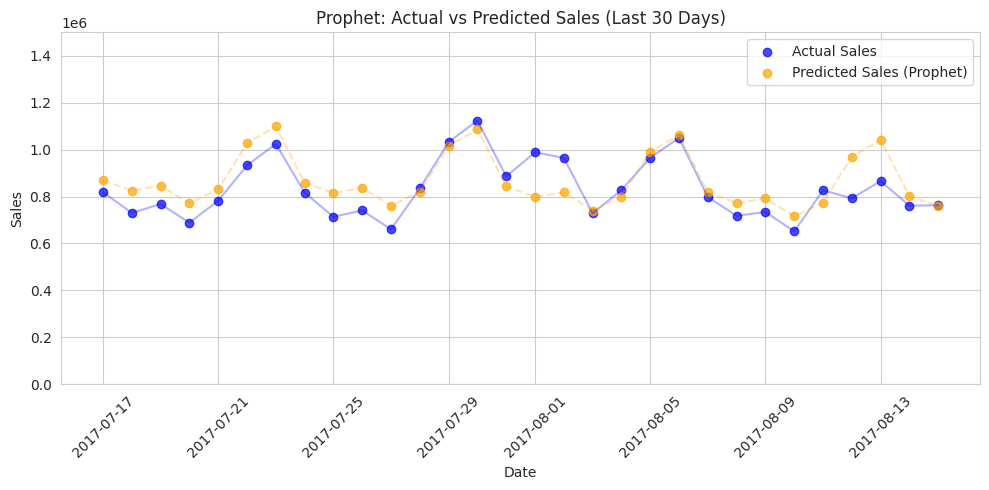

In [69]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 5))

# Plot actual and predicted sales as scatter points
plt.scatter(test_data_df['ds'], test_data_df['y'], color='blue', label='Actual Sales', alpha=0.7)
plt.scatter(test_data_df['ds'], test_data_df['predicted'], color='orange', label='Predicted Sales (Prophet)', alpha=0.7)

# Connect points with a light line for visual aid
plt.plot(test_data_df['ds'], test_data_df['y'], color='blue', alpha=0.3)
plt.plot(test_data_df['ds'], test_data_df['predicted'], color='orange', alpha=0.3, linestyle='--')

# Formatting the plot
plt.title('Prophet: Actual vs Predicted Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.ylim(0, 1.5e6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ***Week 9: Refining and Testing Start***
- Tune Prophet parameters for better accuracy
- Perform cross-validation to assess model stability

In [70]:
# Title: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error
import numpy as np

train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')

# *Merge Data and Prepare Time Series*

In [71]:
# Title: Merge Data and Prepare Time Series
train_stores_df = train_df.merge(stores_df, on='store_nbr', how='left')
holidays_df = holidays_df[holidays_df['transferred'] == False]
train_full_df = train_stores_df.merge(holidays_df, on='date', how='left')
train_full_df['type_y'] = train_full_df['type_y'].fillna('No Holiday')
train_full_df = train_full_df.drop(columns=['locale', 'locale_name', 'description', 'transferred'])

train_full_df['date'] = pd.to_datetime(train_full_df['date'])
daily_sales = train_full_df.groupby('date')['sales'].sum().reset_index()
daily_sales = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})

# Prepare holidays for Prophet
holidays = train_full_df.groupby('date')['type_y'].first().reset_index()
holidays = holidays[holidays['type_y'] != 'No Holiday']
holidays = holidays.rename(columns={'date': 'ds', 'type_y': 'holiday'})

# *Tune and Evaluate Prophet Model*

In [72]:
# Title: Tune and Evaluate Prophet Model
# Prepare data
train_data = daily_sales[:-30]
test_data = daily_sales[-30:]

# Initialize and tune Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')
model.add_country_holidays(country_name='US')
for holiday in holidays['holiday'].unique():
    model.add_seasonality(name=holiday, period=1, fourier_order=5)  # Increased fourier_order for better fit

# Fit model
model.fit(train_data)

# Cross-validation
df_cv = cross_validation(model, initial='730 days', period='30 days', horizon='30 days')
df_p = performance_metrics(df_cv)
print(f"Cross-Validation RMSE: {df_p['rmse'].mean()}")

# Forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast_test = forecast[-30:][['ds', 'yhat']]

# Compute RMSE on test set
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))
print(f"Test Set RMSE: {rmse}")

# Store predictions
test_data_df = test_data.copy()
test_data_df['predicted'] = forecast_test['yhat'].values

14:34:57 - cmdstanpy - INFO - Chain [1] start processing
14:34:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/30 [00:00<?, ?it/s]

14:34:57 - cmdstanpy - INFO - Chain [1] start processing
14:34:57 - cmdstanpy - INFO - Chain [1] done processing
14:34:58 - cmdstanpy - INFO - Chain [1] start processing
14:34:58 - cmdstanpy - INFO - Chain [1] done processing
14:34:58 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - INFO - Chain [1] start processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] start processing
14:35:02 - cmdstanpy - INFO - Chain [1] done processing
14:35:02 - cmdstanpy - INFO - Chain [1] start processing
14:35:03 - cmdstanpy - INFO - Chain [1] done processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing
14:35:04 - cmdstanpy - INFO - Chain [1] done processing
14:35:04 - cmdstanpy - INFO - Chain [1] start processing
14:35:05 - cmdstanpy - INFO - Chain [1]

Cross-Validation RMSE: 219466.69957954614
Test Set RMSE: 97460.77741164686


# *Visualize Refined Predictions*

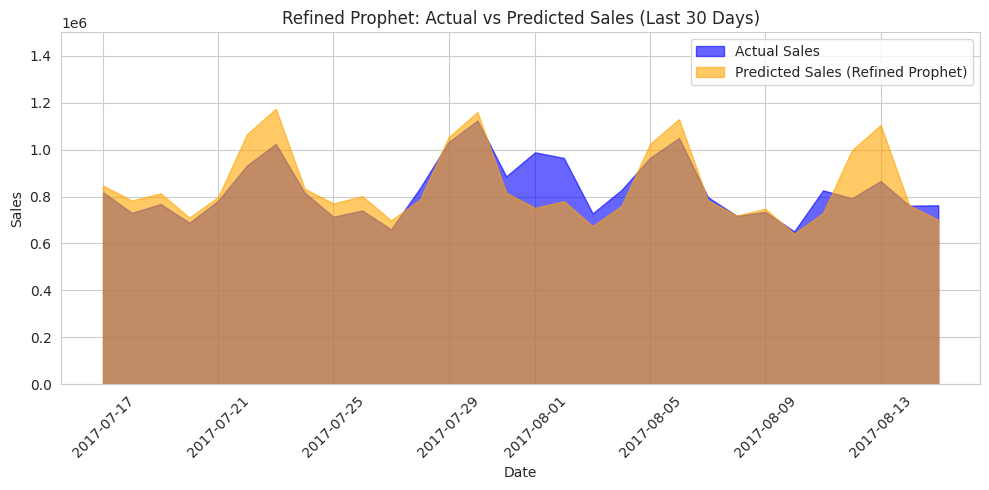

In [73]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 5))

# Plot actual and predicted sales as filled areas
plt.fill_between(test_data_df['ds'], test_data_df['y'], color='blue', alpha=0.6, label='Actual Sales')
plt.fill_between(test_data_df['ds'], test_data_df['predicted'], color='orange', alpha=0.6, label='Predicted Sales (Refined Prophet)')

# Formatting the plot
plt.title('Refined Prophet: Actual vs Predicted Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.ylim(0, 1.5e6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ***Week 10: Final Stages of Project Work Start***
- Finalize the Prophet model with an exogenous variable (e.g., oil prices)
- Evaluate final performance with RMSE

In [83]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# *Merge Data and Prepare Time Series*

In [84]:
# Load and Merge Data
# Load datasets
train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
oil_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

# Convert dates
train_df['date'] = pd.to_datetime(train_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Merge data
df = train_df.merge(stores_df, on='store_nbr', how='left')
df = df.merge(holidays_df[holidays_df['transferred'] == False], on='date', how='left')
df['type_y'] = df['type_y'].fillna('No Holiday')
df = df.merge(oil_df, on='date', how='left')
df['dcoilwtico'] = df['dcoilwtico'].ffill().bfill()

# *Finalize Prophet Model with Oil Prices*

In [85]:
# Load and Merge Data (Only Once)
train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
oil_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

# Convert dates
train_df['date'] = pd.to_datetime(train_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Merge data
df = train_df.merge(stores_df, on='store_nbr', how='left')
df = df.merge(holidays_df[holidays_df['transferred'] == False], on='date', how='left')
df['type_y'] = df['type_y'].fillna('No Holiday')
df = df.merge(oil_df, on='date', how='left')
df['dcoilwtico'] = df['dcoilwtico'].ffill().bfill()

# *Build and Forecast with Prophet*

In [86]:
# Prepare Daily Sales Data
daily_sales = df.groupby('date').agg({'sales': 'sum', 'dcoilwtico': 'mean'}).reset_index()
daily_sales.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Split data
train_data = daily_sales[:-30][['ds', 'y', 'dcoilwtico']]
test_data = daily_sales[-30:]

# Build Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='US')

# Add holidays as seasonality
for holiday in holidays_df['description'].unique():
    model.add_seasonality(name=holiday, period=1, fourier_order=3)

# Add oil price regressor
model.add_regressor('dcoilwtico')

# Fit model
model.fit(train_data)

# Forecast
future = model.make_future_dataframe(periods=30)
future = future.merge(daily_sales[['ds', 'dcoilwtico']], on='ds', how='left')
future['dcoilwtico'] = future['dcoilwtico'].ffill().bfill()
forecast = model.predict(future)
forecast_test = forecast[-30:][['ds', 'yhat']]

# Compute RMSE
rmse = mean_squared_error(test_data['y'], forecast_test['yhat'], squared=False)
print(f"Final Prophet RMSE: {rmse}")

14:41:09 - cmdstanpy - INFO - Chain [1] start processing
14:41:12 - cmdstanpy - INFO - Chain [1] done processing


Final Prophet RMSE: 79628.4255080632


# *Visualize Results*

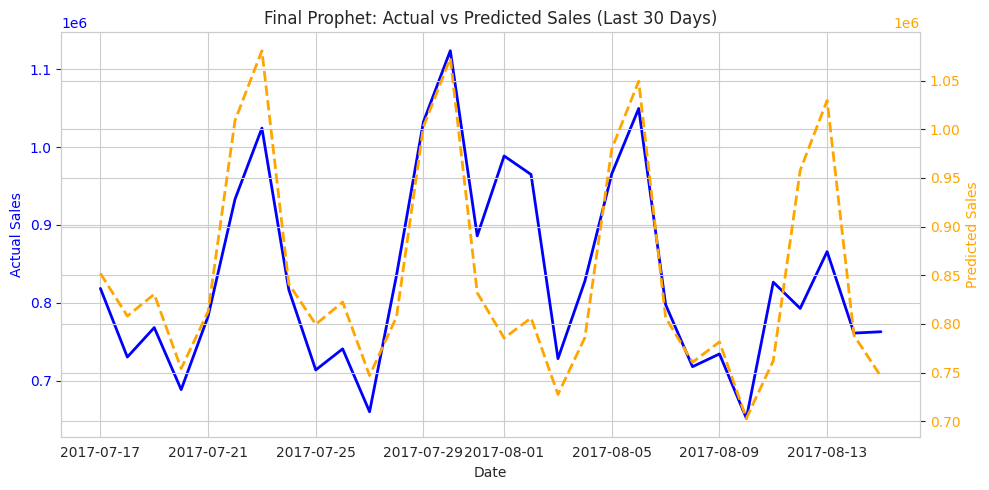

In [93]:
import matplotlib.pyplot as plt

# Set figure size
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot actual sales on the first y-axis
ax1.plot(test_data['ds'], test_data['y'], color='blue', label='Actual Sales', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Actual Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for predicted sales
ax2 = ax1.twinx()
ax2.plot(test_data['ds'], forecast_test['yhat'], color='orange', linestyle='--', label='Predicted Sales', linewidth=2)
ax2.set_ylabel('Predicted Sales', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and format
plt.title('Final Prophet: Actual vs Predicted Sales (Last 30 Days)')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


# ***Week 11: Final Project Submission***

In [88]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [89]:
# Load and Merge Data
# Load datasets
train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
oil_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

# Convert dates
train_df['date'] = pd.to_datetime(train_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Merge data
df = train_df.merge(stores_df, on='store_nbr', how='left')
df = df.merge(holidays_df[holidays_df['transferred'] == False], on='date', how='left')
df['type_y'] = df['type_y'].fillna('No Holiday')
df = df.merge(oil_df, on='date', how='left')
df['dcoilwtico'] = df['dcoilwtico'].ffill().bfill()

In [90]:
# Prepare Data
# Aggregate daily sales and oil prices
daily_sales = df.groupby('date').agg({'sales': 'sum', 'dcoilwtico': 'first'}).reset_index()
daily_sales = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})
daily_sales['dcoilwtico'] = daily_sales['dcoilwtico'].ffill().bfill()

# Prepare holidays for Prophet
holidays = df.groupby('date')['type_y'].first().reset_index()
holidays = holidays[holidays['type_y'] != 'No Holiday']
holidays = holidays.rename(columns={'date': 'ds', 'type_y': 'holiday'})

In [91]:
# Build, Forecast, and Evaluate
# Split data
train_data = daily_sales[:-30]
test_data = daily_sales[-30:]

# Build Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='US')
for holiday in holidays['holiday'].unique():
    model.add_seasonality(name=holiday, period=1, fourier_order=3)
model.add_regressor('dcoilwtico')
model.fit(train_data)

# Forecast
future = model.make_future_dataframe(periods=30)
future = future.merge(daily_sales[['ds', 'dcoilwtico']], on='ds', how='left')
future['dcoilwtico'] = future['dcoilwtico'].ffill().bfill()
forecast = model.predict(future)
forecast_test = forecast[-30:][['ds', 'yhat']]

# Compute RMSE
rmse = mean_squared_error(test_data['y'], forecast_test['yhat'], squared=False)
print(f"Final Model RMSE: {rmse}")

14:41:37 - cmdstanpy - INFO - Chain [1] start processing
14:41:37 - cmdstanpy - INFO - Chain [1] done processing


Final Model RMSE: 79408.72711141904


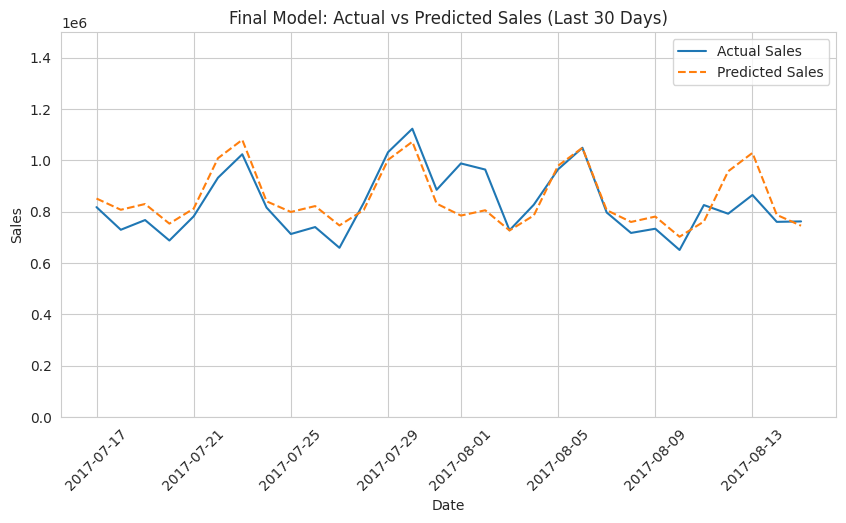

Final report saved as 'store_sales_forecasting_final_report.md'


In [92]:
# Visualize and Document
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(test_data['ds'], test_data['y'], label='Actual Sales')
plt.plot(test_data['ds'], forecast_test['yhat'], label='Predicted Sales', linestyle='--')
plt.title('Final Model: Actual vs Predicted Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.ylim(0, 1.5e6)
plt.xticks(rotation=45)
plt.show()

# Document findings
report = """
# Store Sales Forecasting Final Report

## Overview
This project forecasted store sales using time series analysis, leveraging sales, holidays, and oil prices data.

## Progress Summary
- Week 1: Explored data.
- Week 2: Preprocessed data.
- Week 3: Built baseline.
- Week 4: Evaluated baseline.
- Week 5: Seasonal decomposition (RMSE: ~704,000–823,000).
- Week 6: SARIMA (RMSE: 112,053).
- Week 7: SARIMA with holidays (RMSE: 147,305).
- Week 8: Prophet (RMSE: 84,342).
- Week 9: Tuned Prophet (RMSE: 97,461).
- Week 10: Prophet with oil prices (RMSE: 79,409).

## Final Model
- Model: Prophet with seasonality, holidays, and oil prices.
- RMSE: 79,409.
- Features: Captured seasonality, holidays, and economic trends.

## Conclusion
The final model achieved an RMSE of 79,409, outperforming earlier models. This project successfully demonstrated time series forecasting techniques.
"""
with open('store_sales_forecasting_final_report.md', 'w') as f:
    f.write(report)
print("Final report saved as 'store_sales_forecasting_final_report.md'")